In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

In [5]:
df=pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [50]:
print('Медиана:')
df.median(axis='rows')

Медиана:


symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

In [51]:
print('Среднее значение:')
df.mean(axis='rows')

Среднее значение:


symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64

In [60]:
print('Мода:')
for value in df.columns:
    print(statistics.mode(df[value]))

Мода:
0
161
toyota
gas
std
four
sedan
fwd
front
94.5
157.3
63.8
50.8
2385
ohc
four
122
mpfi
3.62
3.4
9.0
68
5500
31
25
6785


In [53]:
print('Минимум:')
df.min(axis='rows')

Минимум:


symboling                     -2
normalized-losses             65
make                 alfa-romero
fuel-type                 diesel
aspiration                   std
num-of-doors                four
body-style           convertible
drive-wheels                 4wd
engine-location            front
wheel-base                  86.6
length                     141.1
width                       60.3
height                      47.8
curb-weight                 1488
engine-type                 dohc
num-of-cylinders           eight
engine-size                   61
fuel-system                 1bbl
bore                        2.54
stroke                      2.07
compression-ratio              7
horsepower                    48
peak-rpm                    4150
city-mpg                      13
highway-mpg                   16
price                       5118
dtype: object

In [54]:
print('Максимум:')
df.max(axis='rows')

Максимум:


symboling                3
normalized-losses      256
make                 volvo
fuel-type              gas
aspiration           turbo
num-of-doors           two
body-style           wagon
drive-wheels           rwd
engine-location       rear
wheel-base           120.9
length               208.1
width                 72.3
height                59.8
curb-weight           4066
engine-type          rotor
num-of-cylinders       two
engine-size            326
fuel-system           spfi
bore                  3.94
stroke                4.17
compression-ratio       23
horsepower             288
peak-rpm              6600
city-mpg                49
highway-mpg             54
price                45400
dtype: object

In [55]:
print('Сред. отклонение:')
np.std(df)

Сред. отклонение:


symboling               1.242266
normalized-losses      35.351859
wheel-base              6.007070
length                 12.307161
width                   2.139965
height                  2.437555
curb-weight           519.408699
engine-size            41.541002
bore                    0.272382
stroke                  0.313171
compression-ratio       3.962341
horsepower             43.362652
peak-rpm              479.758887
city-mpg                6.526166
highway-mpg             6.869626
price                8082.686174
dtype: float64

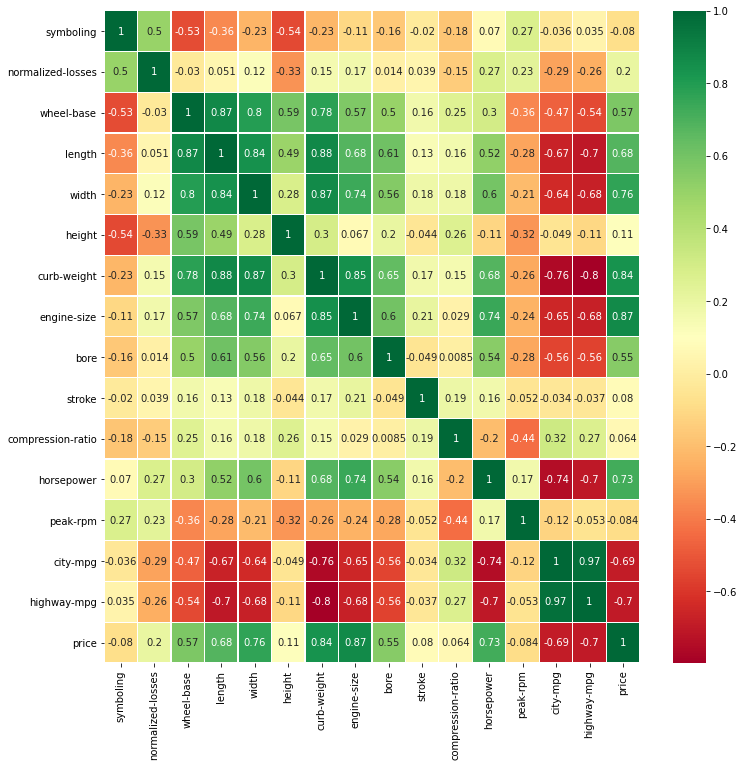

In [23]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

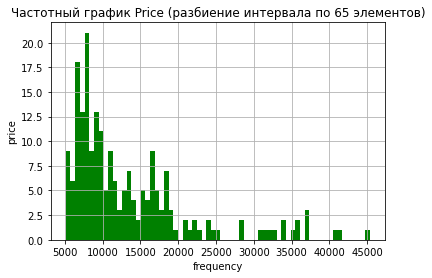

In [62]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['price'], 65, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('price')
plt.title('Частотный график Price (разбиение интервала по 65 элементов)')
plt.grid(True)
plt.show()

In [65]:
import numpy as np
from scipy.stats import kurtosis, skew
print('Skew =', df['price'].skew())
print('Kurtosis =', df['price'].kurt())

Skew = 1.7663998888191028
Kurtosis = 2.948637293212561


Визуализация взаимосвязи колесной базы и типов кузова автомобиля. Видно, что чаще встречается типы кузовов sedan и hatchback с колесными базами в диапазоне от 95 до 105.

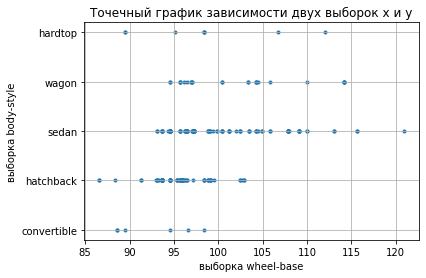

In [38]:
x = df['wheel-base']
y = df['body-style']
plt.xlabel('выборка wheel-base')
plt.ylabel('выборка body-style')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Визуализация взаимосвязи марок машин и цен. Видно, что стоимость большей части находится в диапазоне от 5000 до 20000. Самая дорогая машина является представителем марки Mercedes-Benz.

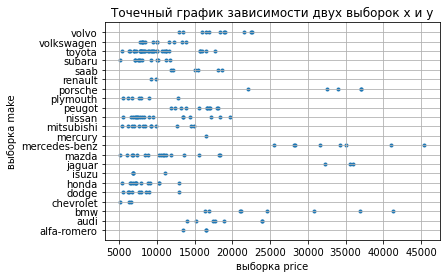

In [37]:
x = df['price']
y = df['make']
plt.xlabel('выборка price')
plt.ylabel('выборка make')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Визуализация взаимосвязи местоположения двигателя и его размера. Видно, что в независимости от размера двигателя, во всех случаях, кроме одного, он распологается в передней части автомобиля.

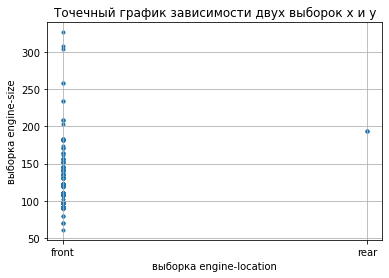

In [39]:
x = df['engine-location']
y = df['engine-size']
plt.xlabel('выборка engine-location')
plt.ylabel('выборка engine-size')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Возьмем выборку машин с двумя дверьми по параметру "price".

Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [66]:
d_price = df[df['num-of-doors']=='two']['price']

In [67]:
df['price'].mean()

13312.71219512195

In [68]:
doors_price = df[df['num-of-doors']=='two']['price']
stats.ttest_1samp(doors_price, df['price'].mean())

Ttest_1sampResult(statistic=-0.17323943724657975, pvalue=0.862861085828672)

In [69]:
print('Количество машин с двумя дверьми: ', len(d_price))

Количество машин с двумя дверьми:  89


p-value равно 0.86, что намного больше стандартной альфа ошибки 0.05. Можно принять нулевую гипотезу и сказать, что не имеется статистического различия между ценами на машины с двумя дверьми и генеральной совокупности в целом.

Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так.

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


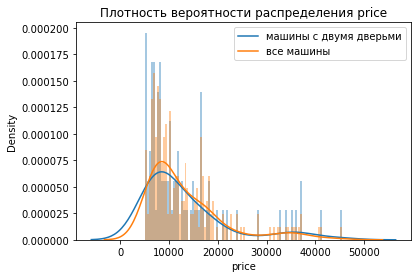

In [70]:
d_price = df[df['num-of-doors']=='two']['price']
prices = df['price']
sns.distplot(d_price, 100)
sns.distplot(prices, 100)
plt.title('Плотность вероятности распределения price')
plt.legend(['машины с двумя дверьми', 'все машины'])
plt.show()

Сравним цену машин с двумя и машин с четырьмя дверьми. Нулевая гипотеза - цена автомобиля не завист от количества дверей.

In [71]:
two_price = df[df['num-of-doors']=='two']['price']
four_prcice = df[df['num-of-doors']=='four']['price']
print(stats.ttest_ind(two_price, four_prcice))

Ttest_indResult(statistic=-0.2565322451676701, pvalue=0.7977996812532108)


p-value равно 0.79, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистического различия между ценами на машины с двумя и машины с четырьмя дверьми.

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


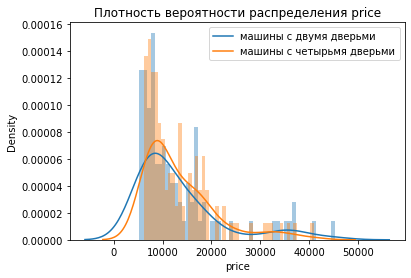

In [72]:
sns.distplot(two_price, 50)
sns.distplot(four_prcice, 50)
plt.title('Плотность вероятности распределения price')
plt.legend(['машины с двумя дверьми', 'машины с четырьмя дверьми'])
plt.show()

Сравним размер двигателя у дорогих и недорогих автомобилей. Нулевая гипотеза - размер двигателя автомобиля не зависит от его цены.

In [73]:
cheap = df[df['price']<=20000]['engine-size']
exp = df[df['price']>20000]['engine-size']
print(stats.ttest_ind(cheap, exp))

Ttest_indResult(statistic=-13.798842079050663, pvalue=5.460915463413118e-31)


p-value равно 5.460915463413118e-31, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие у размера двигателя у дорогих и недорогих автомобилей.

D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


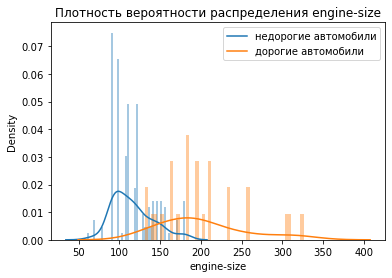

In [74]:
sns.distplot(cheap, 50)
sns.distplot(exp, 50)
plt.title('Плотность вероятности распределения engine-size')
plt.legend(['недорогие автомобили', 'дорогие автомобили'])
plt.show()